In [15]:
import numpy as np
import h5py
import seaborn as sns

In [16]:
%matplotlib inline

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
f = h5py.File('runs/20171023-20-16-734822/encs.h5', 'r')
encs = f['enc'][:]
masses = f['y'][:]
f.close()
X = encs.reshape(encs.shape[0], -1)[:,9:10]
y = np.log(masses[:, 1, 0])
num_train = 239400
X_tr, X_te = X[:num_train], X[num_train:]
y_tr, y_te = y[:num_train], y[num_train:]

IOError: Unable to open file (File signature not found)

In [85]:
for ind in range(X_tr.shape[1]):
    print str(ind)+": ", np.corrcoef(X_tr[:,ind], y_tr)[0, 1]

0:  0.985222853193


In [86]:
# X_tr = np.random.rand(*X_tr.shape)
# X_te = np.random.rand(*X_te.shape)

In [87]:
def predict(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    r2_in = model.score(X_tr, y_tr)
    r2_out = model.score(X_te, y_te)
    print "In-sample R^2:", r2_in
    print "OOS R^2:", r2_out
    pred_tr = model.predict(X_tr)
    pred_te = model.predict(X_te)
    return pred_tr, pred_te

In [88]:
model = LinearRegression()
pred_tr, pred_te = predict(model, X_tr, y_tr, X_te, y_te)

In-sample R^2: 0.970664070459
OOS R^2: 0.972188175748


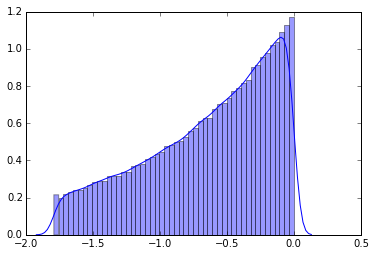

In [89]:
sns.distplot(y_te)

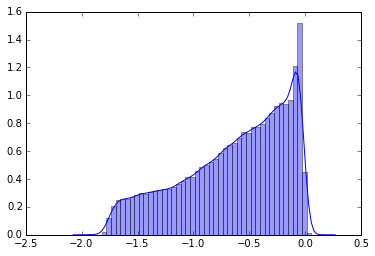

In [75]:
sns.distplot(pred_te)